<a href="https://colab.research.google.com/github/teamHC-G12/Cervical-Cancer-Risk-Classification/blob/master/data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")

df_nan = df.replace("?", np.nan)



df1 = df_nan.apply(pd.to_numeric, axis=0)


df1.isnull().sum()



Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [0]:
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Num of pregnancies'].fillna(df1['Num of pregnancies'].median(), inplace = True)
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Smokes'].fillna(0,inplace = True)
df1['Number of sexual partners'].fillna(df1['Number of sexual partners'].median(), inplace = True)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(df1.loc[l,'Smokes (years)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(0)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(df1.loc[l,'Smokes (packs/year)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(0)
df2 = df1.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis = 1)


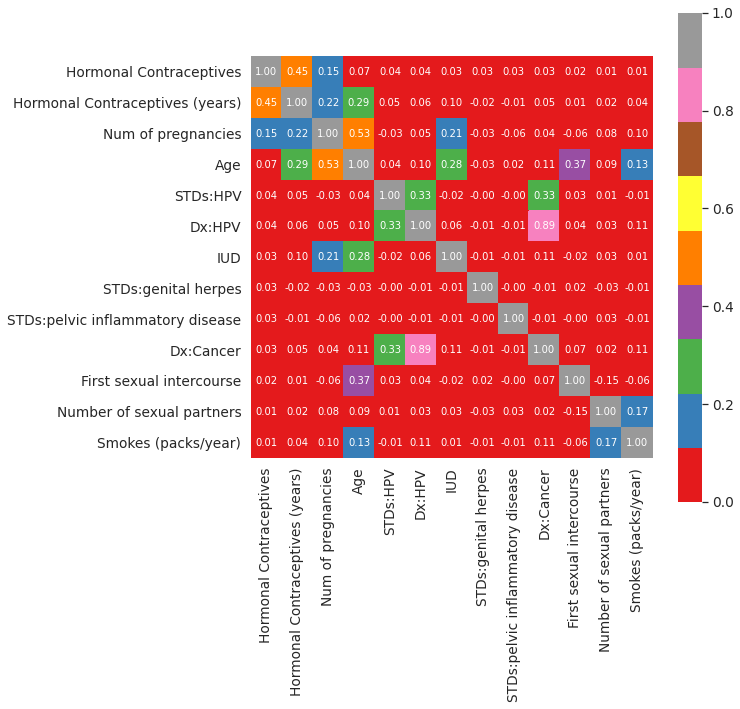

In [0]:


corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()



In [0]:


# If patient is older than sample mean or number of pregnancies is lower than mean then patient may take Hormonal Contraceptives
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
l = (df2['Num of pregnancies']<df2['Num of pregnancies'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
df2['Hormonal Contraceptives'].fillna(0,inplace = True)

df2['Hormonal Contraceptives'].isnull().sum()



0

In [0]:
l = (df2['Hormonal Contraceptives'] == 1)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(df2['Hormonal Contraceptives (years)'].median())
l = (df2['Hormonal Contraceptives'] == 0)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(0)

In [0]:
len(df2[(df2['Hormonal Contraceptives'] == 1) & (df2['Hormonal Contraceptives (years)'] == 0) ])

0

In [0]:
len(df2[(df2['Hormonal Contraceptives'] == 0) & (df2['Hormonal Contraceptives (years)'] != 0) ])

0

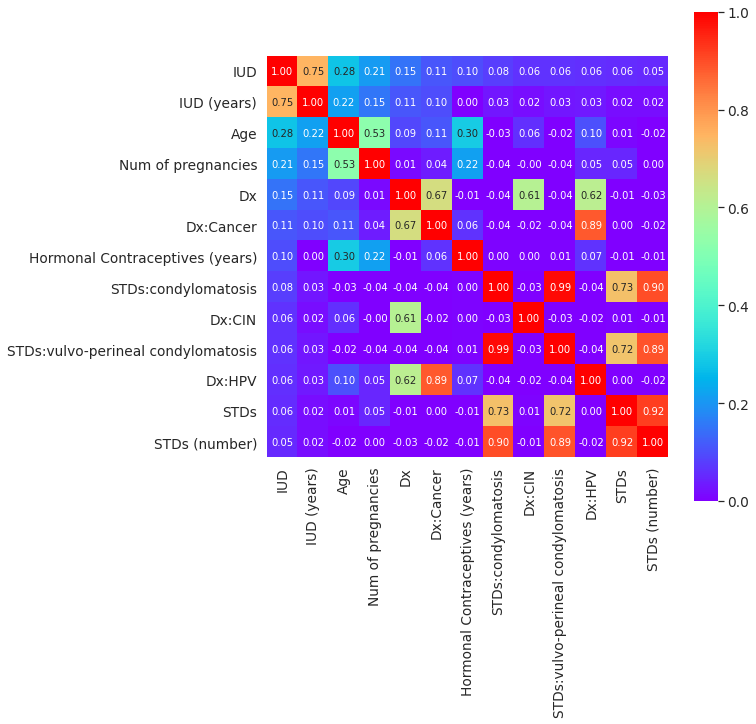

In [0]:


corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'IUD')['IUD'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'rainbow', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()



In [0]:


len(df2[(df2['Age']>df2['Age'].mean())&(df2['IUD']==1)])



66

In [0]:
len(df2[df2['IUD']==1])

83

In [0]:


l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'IUD'] = df2.loc[l,'IUD'].fillna(1)

len(df2[(df2['Num of pregnancies']<df2['Num of pregnancies'].mean())&(df2['IUD']==0)])



458

In [0]:


len(df2[df2['IUD']==0])



658

In [0]:


df2['IUD'].fillna(0, inplace = True)



In [0]:


l = (df2['IUD'] == 1)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(df2['IUD (years)'].median())
l = (df2['IUD'] == 0)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(0)



In [0]:


len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])



38

In [0]:


l = (df2['IUD'] == 1) & (df2['IUD (years)'] == 0)
df2.loc[l,'IUD (years)'] = df2['IUD (years)'].mean()

len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])



0

In [0]:
len(df2[(df2['IUD'] == 0) & (df2['IUD (years)'] != 0) ])

0

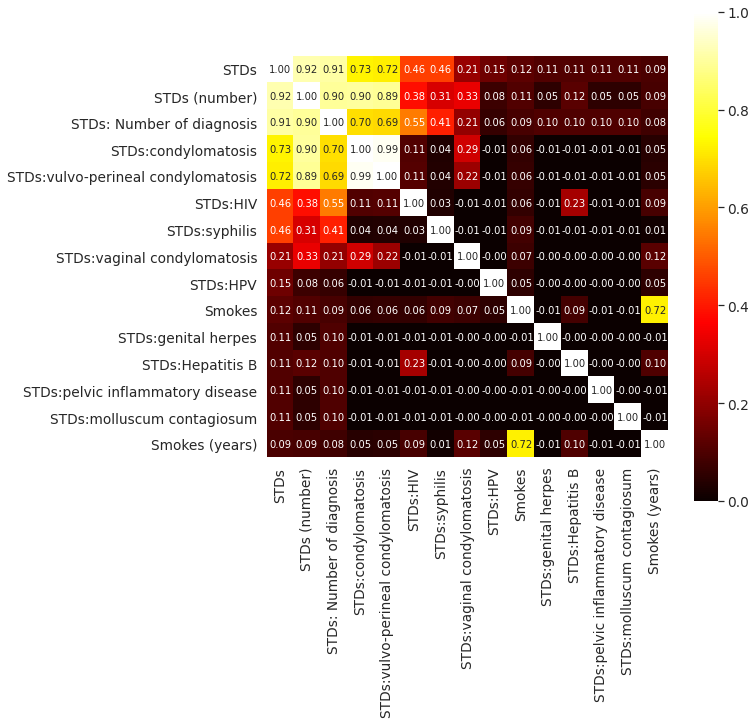

In [0]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'STDs')['STDs'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'hot', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()


In [0]:
df3 = df2.copy()

l = (df3['STDs:condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:cervical condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vaginal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vulvo-perineal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:syphilis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:pelvic inflammatory disease']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:genital herpes']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:molluscum contagiosum']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:AIDS']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HIV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:Hepatitis B']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HPV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)


In [0]:


len(df[(df3['STDs'] == 1)])



79

In [0]:


len(df3[(df3['Smokes'] == 0) & (df3['STDs'] == 1)])



58

In [0]:
l = (df3['Smokes']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

len(df3[(df3['IUD'] == 0) & (df3['STDs'] == 1)])

127

In [0]:


len(df3[df3['STDs']==1])



168

In [0]:
l = (df3['IUD']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
df3['STDs'].fillna(0, inplace = True)

df3['STDs'].isnull().sum()


0

In [0]:
df3['STDs (number)'].median()

0.0

In [0]:


l = (df3['STDs']==1)
df3.loc[l,'STDs (number)'] = df3.loc[l,'STDs (number)'].fillna(df3['STDs (number)'].mean())
df3['STDs (number)'].fillna(0, inplace = True)

df3['STDs (number)'].isnull().sum()



0

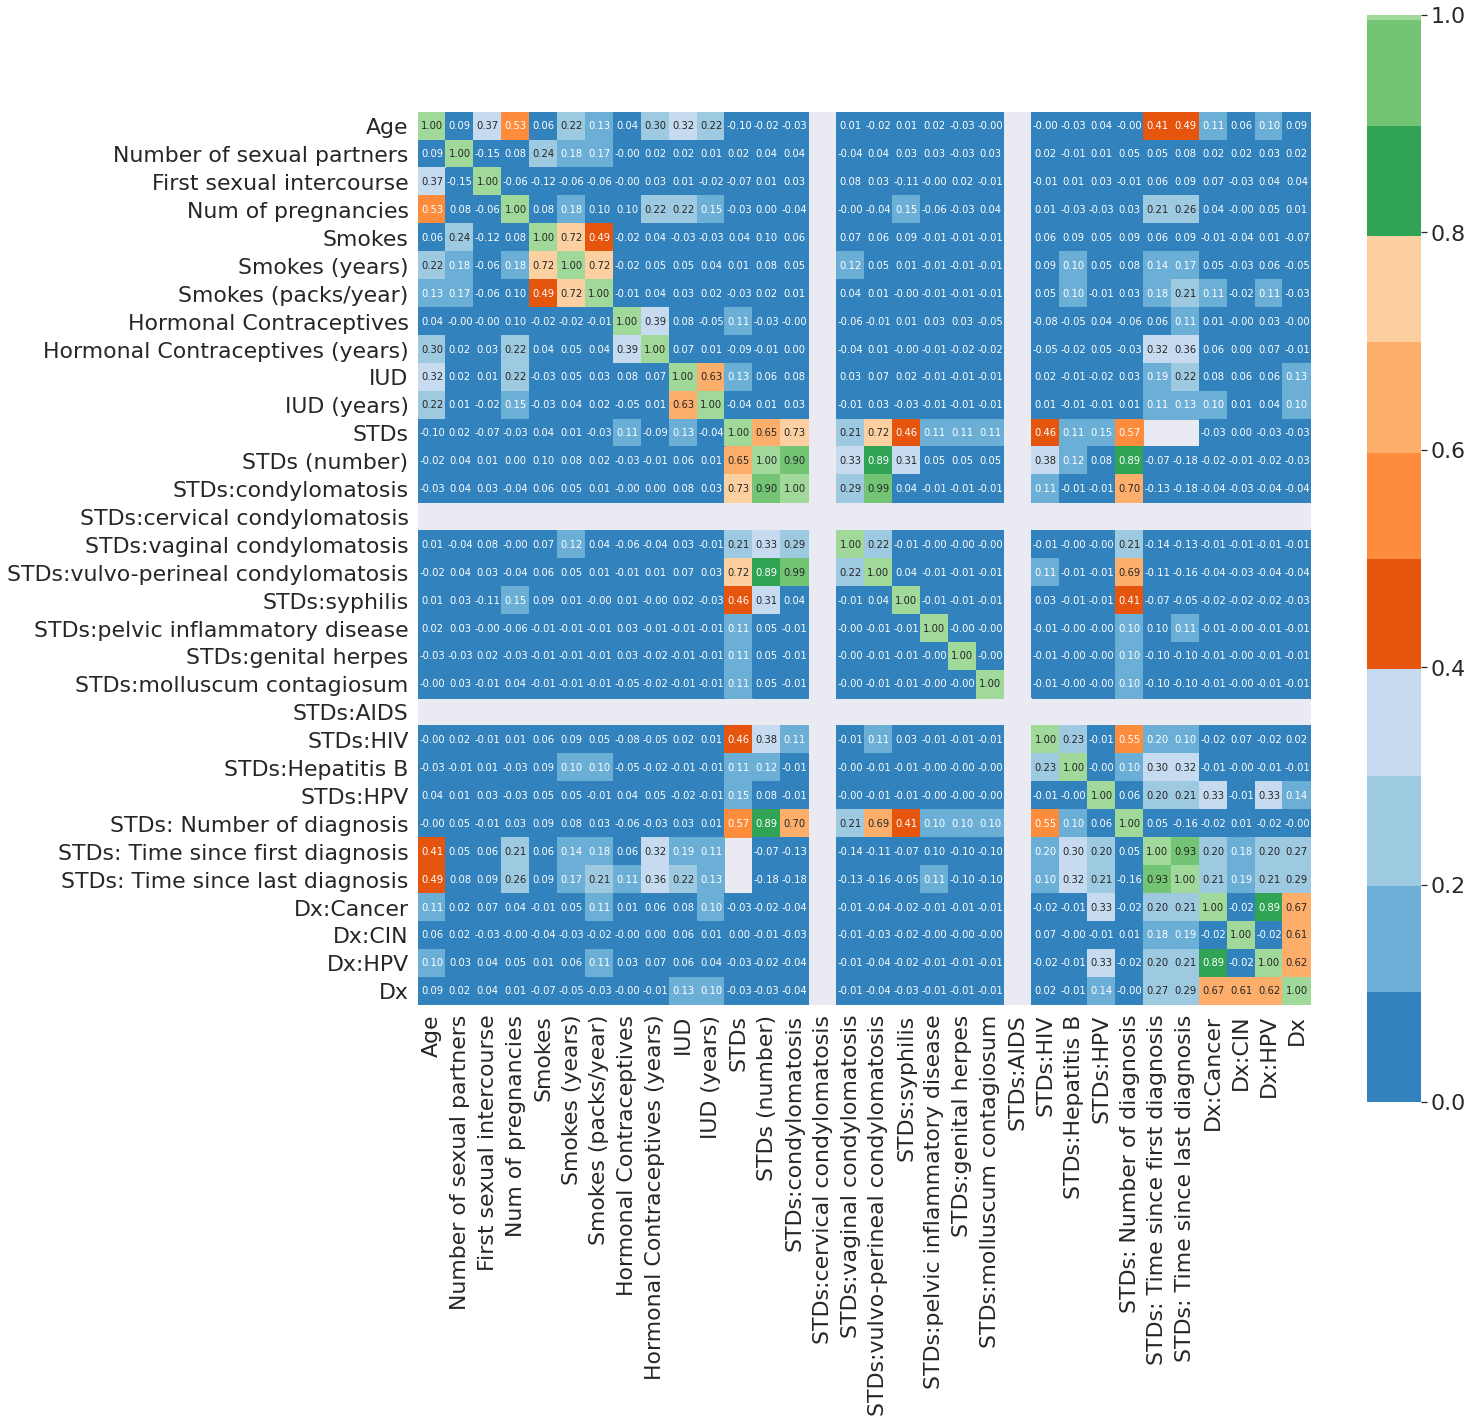

In [0]:
corrmat = df3.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'tab20c', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df3.columns, xticklabels = df3.columns)
plt.show()

In [0]:
df4= df3.copy()

In [0]:


l = (df4['STDs']==0)
df4.loc[l,'STDs:condylomatosis'] = df4.loc[l,'STDs:condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:cervical condylomatosis'] = df4.loc[l,'STDs:cervical condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vaginal condylomatosis'] = df4.loc[l,'STDs:vaginal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vulvo-perineal condylomatosis'] = df4.loc[l,'STDs:vulvo-perineal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:syphilis'] = df4.loc[l,'STDs:syphilis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:pelvic inflammatory disease'] = df4.loc[l,'STDs:pelvic inflammatory disease'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:genital herpes'] = df4.loc[l,'STDs:genital herpes'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:molluscum contagiosum'] = df4.loc[l,'STDs:molluscum contagiosum'].fillna(0)

df4['STDs:molluscum contagiosum'].isnull().sum()



99

In [0]:


df4['STDs:condylomatosis'].fillna(df4['STDs:condylomatosis'].median(),inplace = True)
df4['STDs:cervical condylomatosis'].fillna(df4['STDs:cervical condylomatosis'].median(),inplace = True)
df4['STDs:vaginal condylomatosis'].fillna(df4['STDs:vaginal condylomatosis'].median(),inplace = True)
df4['STDs:vulvo-perineal condylomatosis'].fillna(df4['STDs:vulvo-perineal condylomatosis'].median(),inplace = True)
df4['STDs:syphilis'].fillna(df4['STDs:syphilis'].median(),inplace = True)
df4['STDs:pelvic inflammatory disease'].fillna(df4['STDs:pelvic inflammatory disease'].median(),inplace = True)
df4['STDs:genital herpes'].fillna(df4['STDs:genital herpes'].median(),inplace = True)
df4['STDs:molluscum contagiosum'].fillna(df4['STDs:molluscum contagiosum'].median(),inplace = True)

df4['STDs:condylomatosis'].isnull().sum()



0

In [0]:


l = (df4['STDs']==0)
df4.loc[l,'STDs:AIDS'] = df4.loc[l,'STDs:AIDS'].fillna(0)
df4['STDs:AIDS'].fillna(df4['STDs:AIDS'].median(),inplace = True)

df4['STDs:AIDS'].isnull().sum()



0

In [0]:


len(df4[df4['STDs:HIV']==1])



18

In [0]:


len(df4[(df4['STDs:HIV']==1) & (df4['STDs']==1)])



18

In [0]:


l = (df4['STDs']==1)
df4.loc[l,'STDs:HIV'] = df4.loc[l,'STDs:HIV'].fillna(1)
df4['STDs:HIV'].fillna(0,inplace = True)



In [0]:
len(df4[(df4['STDs']==0) & (df4['STDs:HIV'] == 1)])

0

In [0]:
df4['STDs:HIV'].isnull().sum()

0

In [0]:
len(df4[df4['STDs:Hepatitis B']==1])


1

In [0]:
df4['STDs:Hepatitis B'].fillna(0, inplace = True)

df4['STDs:Hepatitis B'].isnull().sum()

0

In [0]:


df4['STDs:HPV'].fillna(0, inplace = True)

df4['STDs:HPV'].isnull().sum()



0

In [0]:
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since first diagnosis'] = df4.loc[l,'STDs: Time since first diagnosis'].fillna(df4['STDs: Time since first diagnosis'].median())
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since last diagnosis'] = df4.loc[l,'STDs: Time since last diagnosis'].fillna(df4['STDs: Time since last diagnosis'].median())
df4['STDs: Time since last diagnosis'].fillna(0, inplace = True)
df4['STDs: Time since first diagnosis'].fillna(0, inplace = True)

df4['STDs: Time since last diagnosis'].isnull().sum()

0

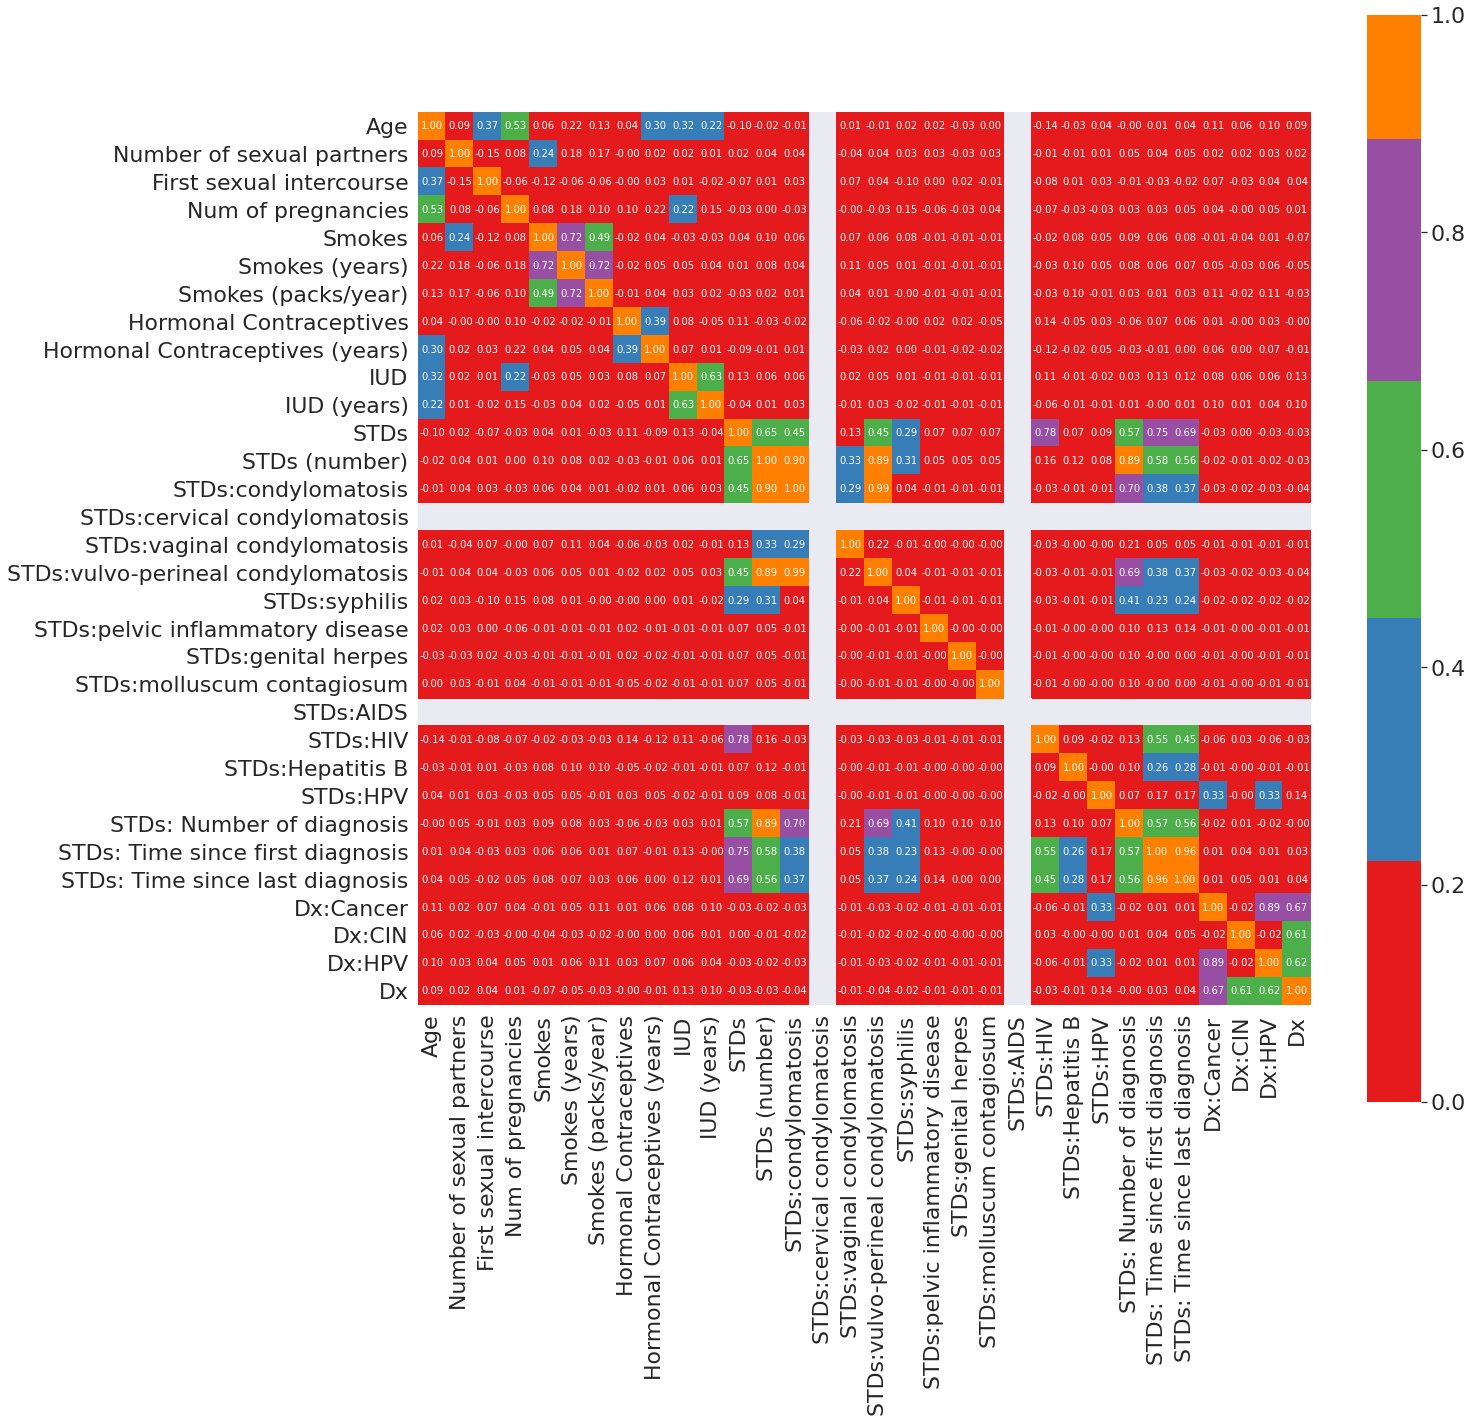

In [0]:


corrmat = df4.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df4.columns, xticklabels = df4.columns)
plt.show()



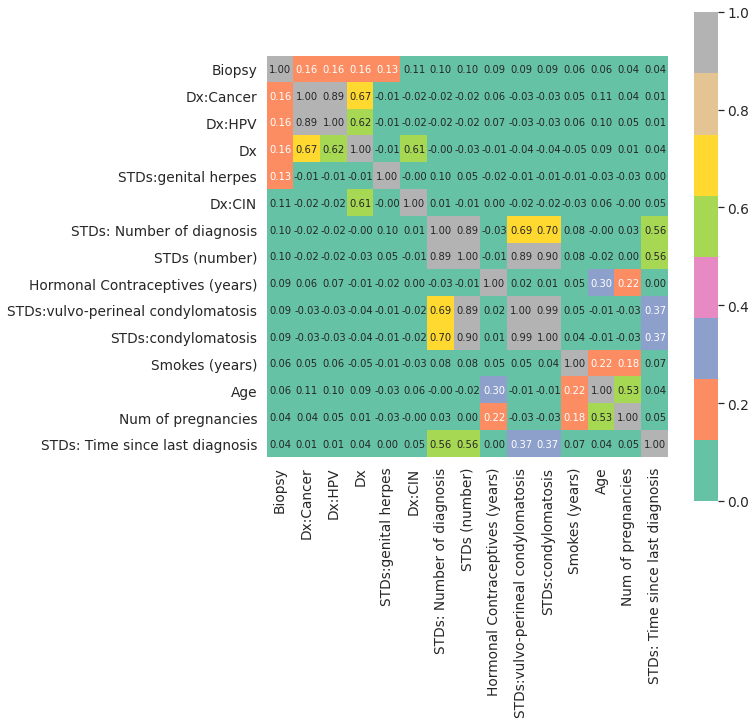

In [0]:
df4['Biopsy'] = df1['Biopsy']

corrmat = df4.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df4[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set2', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

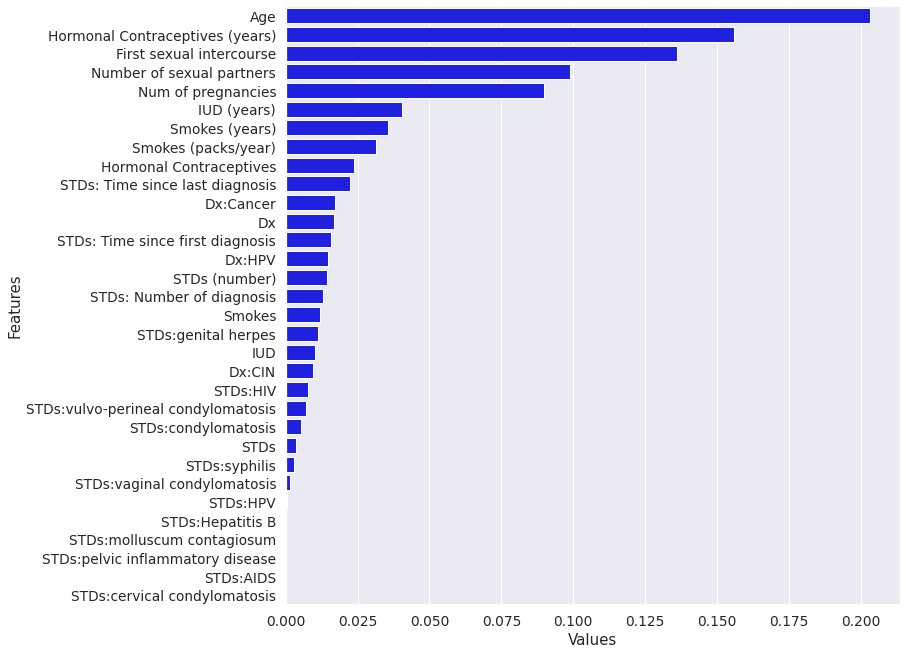

In [0]:


from sklearn.ensemble import RandomForestClassifier

X = df4.drop('Biopsy', axis =1)
Y = df4["Biopsy"]
names = X.columns
rf = RandomForestClassifier()
rf.fit(X, Y)

result_rf = pd.DataFrame()
result_rf['Features'] = X.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Blue")
plt.show()



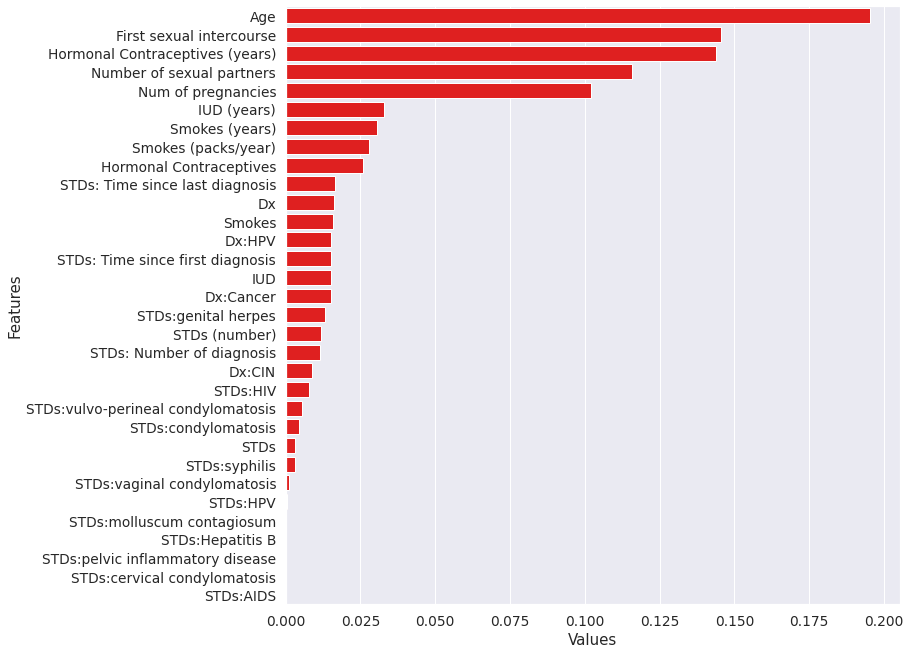

In [0]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

result_et = pd.DataFrame()
result_et['Features'] = X.columns
result_et ['Values'] = model.feature_importances_
result_et.sort_values('Values', inplace=True, ascending =False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_et, color="red")
plt.show()

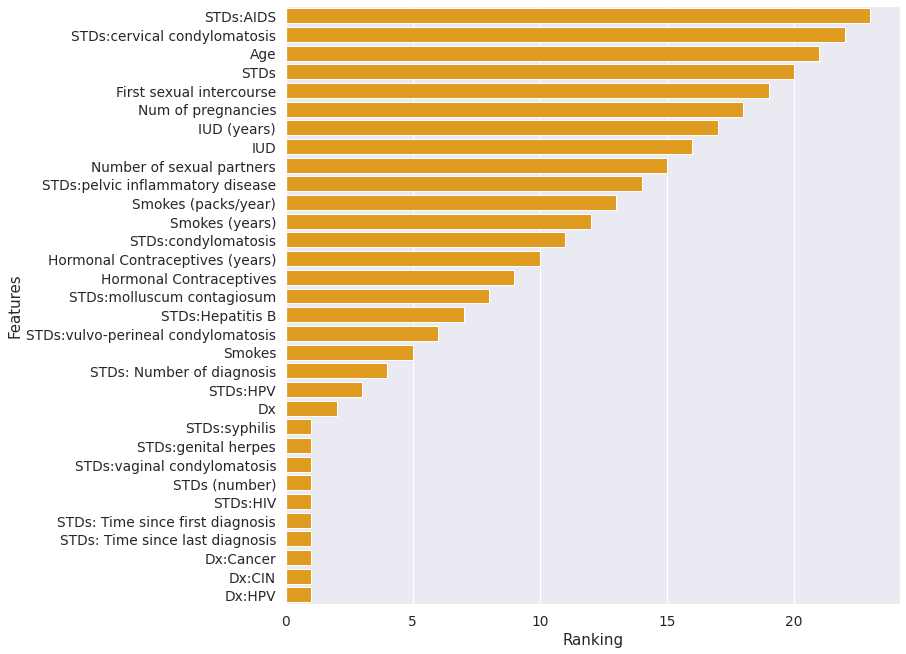

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, Y)

result_lg = pd.DataFrame()
result_lg['Features'] = X.columns
result_lg ['Ranking'] = rfe.ranking_
result_lg.sort_values('Ranking', inplace=True , ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="orange")
plt.show()

In [0]:
df5 = df4.copy()

In [0]:
df5['YAFSI'] = df5['Age'] - df5['First sexual intercourse']
df5['SSY'] = df5['Age'] - df5['Smokes (years)']
df5['SPYP'] = df5['Number of sexual partners'] / df5['YAFSI']
df5['SP'] = df5['Smokes (years)'] / df5['Age']
df5['HCP'] = df5['Hormonal Contraceptives (years)'] / df5['Age']
df5['STDP'] = df5['STDs (number)'] / df5['Age']
df5['IUDP'] = df5['IUD (years)'] / df5['Age']
df5['TSP'] = df5['Smokes (packs/year)'] * df5['Smokes (years)']
df5['NPP'] = df5['Num of pregnancies'] / df5['Age']
df5['NSPP'] = df5['Number of sexual partners'] / df5['Age']
df5['NDP'] = df5['STDs: Number of diagnosis'] / df5['Age']
df5['TBD'] = (df5['STDs: Time since first diagnosis'] - df5['STDs: Time since last diagnosis']) / df5['STDs: Number of diagnosis']
df5['YAHC'] = df5['Age'] - df5['Hormonal Contraceptives (years)']
df5['YAIUD'] = df5['Age'] - df5['IUD (years)']
df5['NPSP'] = df5['Num of pregnancies'] / df5['Number of sexual partners']
df5['IUDSY'] = df5['IUD (years)'] / df5['YAFSI']
df5['HCSY'] = df5['Hormonal Contraceptives (years)'] / df5['YAFSI']



In [0]:
df5.replace([np.inf, -np.inf], np.nan, inplace = True)
df5.fillna(0,inplace=True)

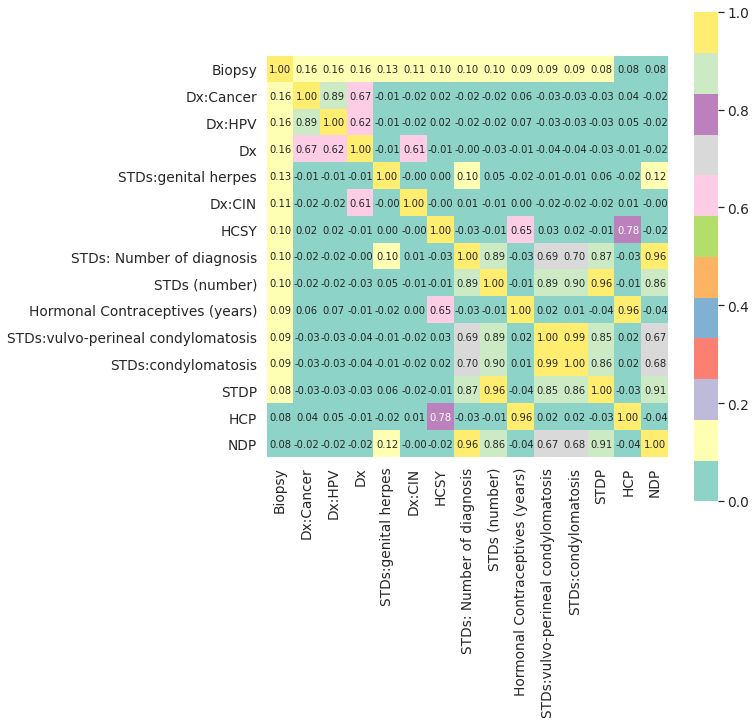

In [0]:
corrmat = df5.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df5[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'Set3', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

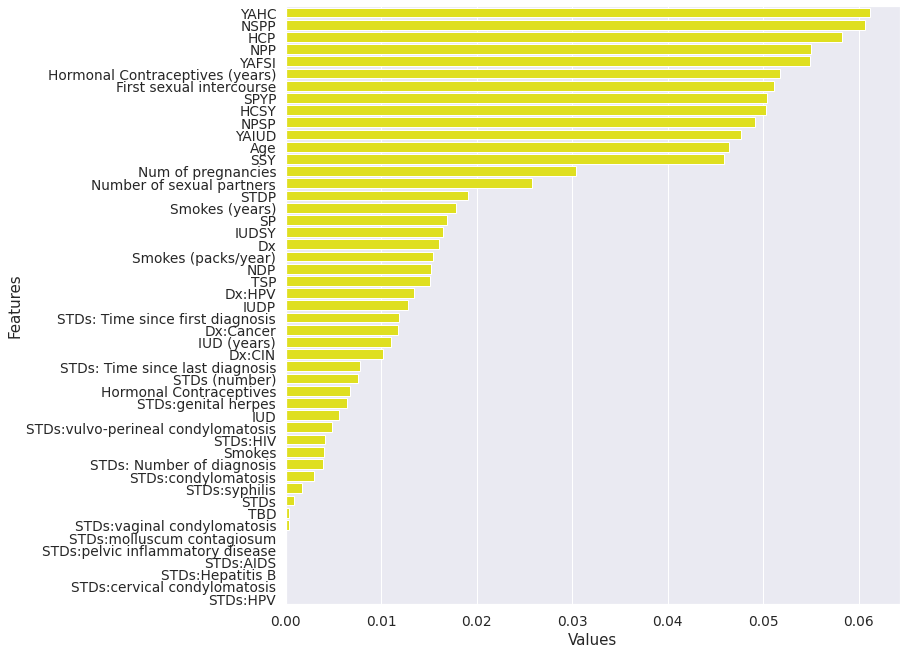

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_p = df5.drop('Biopsy', axis =1)
Y_p = df5["Biopsy"]
names = X_p.columns
rf = RandomForestClassifier()
rf.fit(X_p, Y_p)

result_rf = pd.DataFrame()
result_rf['Features'] = X_p.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values',inplace=True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Yellow")
plt.show()

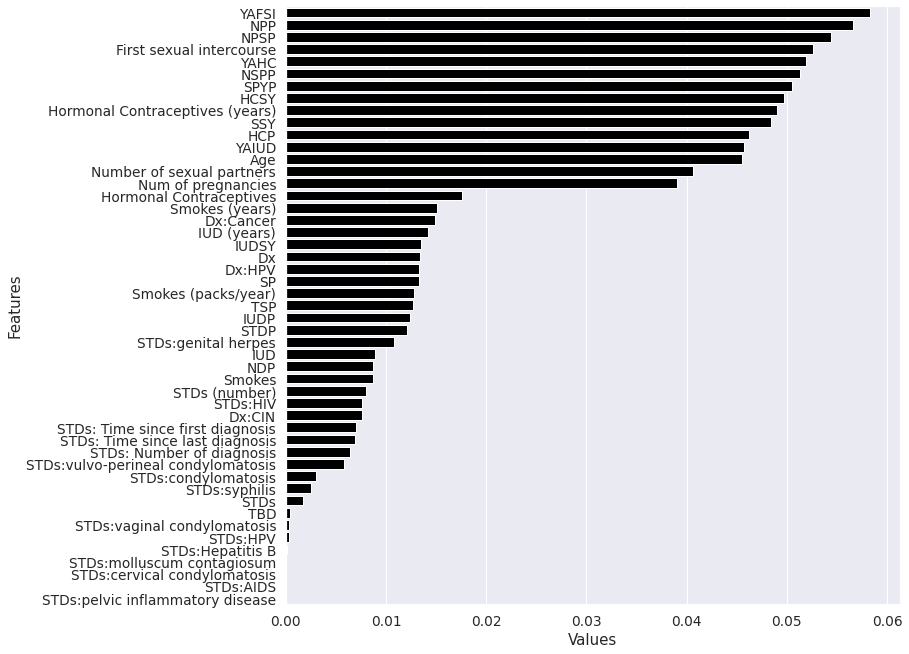

In [0]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_p, Y_p)

result_et = pd.DataFrame()
result_et['Features'] = X_p.columns
result_et ['Values'] = model.feature_importances_
result_et.sort_values('Values',inplace =True,ascending=False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_et, color="black")
plt.show()


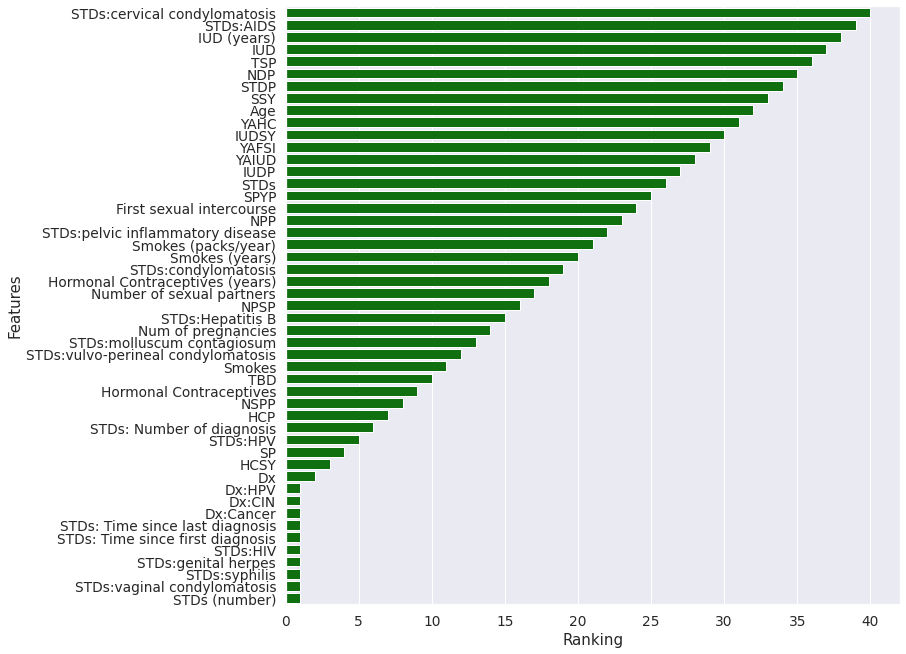

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_p, Y_p)

result_lg = pd.DataFrame()
result_lg['Features'] = X_p.columns
result_lg ['Ranking'] = rfe.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="green")
plt.show()

